In [ ]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=be4b70ef69dbac0e529b3a456add58f7eecfe0aca30e6a362424ccfa5837ae54
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import qiskit
from qiskit import *
qc = QuantumCircuit(2, 2)
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

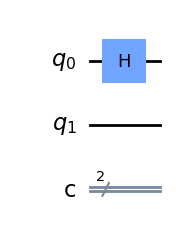

In [ ]:
qc.h(0)
qc.draw(output='mpl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


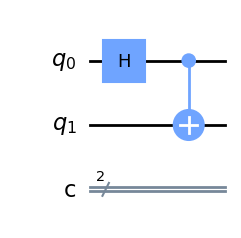

In [ ]:
!pip install pylatexenc
qc.cx(0, 1)
qc.draw(output='mpl')

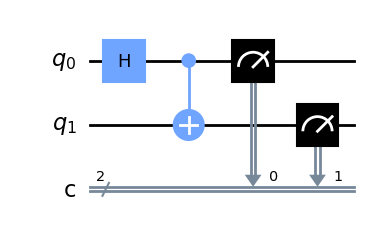

In [ ]:
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = simulator, shots=1000)
job
job.result()
result = job.result()
counts = result.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram


{'11': 471, '00': 529}


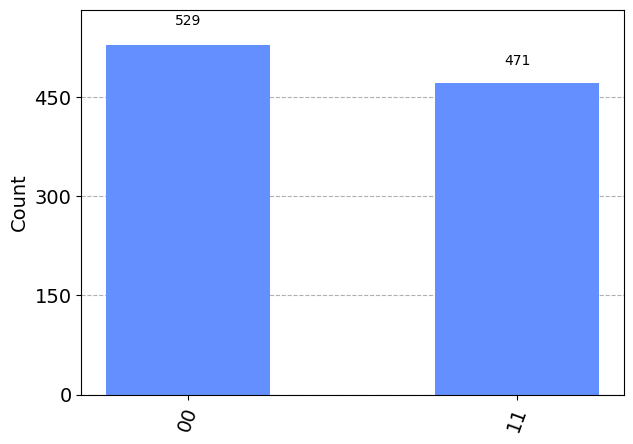

In [ ]:
plot_histogram(counts)

In [ ]:
total_shots = sum(counts.values())
probabilities = {outcome: count/total_shots for outcome, count in counts.items()}
probabilities

{'11': 0.471, '00': 0.529}

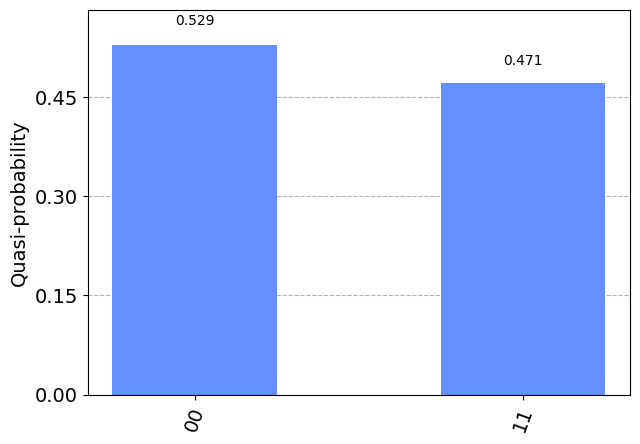

In [ ]:
plot_histogram(probabilities)

In [ ]:
import qiskit
from math import gcd,log
from random import randint
import numpy as np
from qiskit import *
qasm_sim = qiskit.Aer.get_backend('qasm_simulator')
def period(a,N):
    available_qubits = 16
    r=-1

    if N >= 2**available_qubits:
        print(str(N)+' is too big for IBMQX')

    qr = QuantumRegister(available_qubits)
    cr = ClassicalRegister(available_qubits)
    qc = QuantumCircuit(qr,cr)
    x0 = randint(1, N-1)
    x_binary = np.zeros(available_qubits, dtype=bool)

    for i in range(1, available_qubits + 1):
        bit_state = (N%(2**i)!=0)
        if bit_state:
            N -= 2**(i-1)
        x_binary[available_qubits-i] = bit_state

    for i in range(0,available_qubits):
        if x_binary[available_qubits-i-1]:
            qc.x(qr[i])
    x = x0

    while np.logical_or(x != x0, r <= 0):
        r+=1
        qc.measure(qr, cr)
        for i in range(0,3):
            qc.x(qr[i])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
        qc.cx(qr[0],qr[1])
        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[0])
        qc.cx(qr[0],qr[1])
        qc.cx(qr[1],qr[0])

        result = execute(qc,backend = qasm_sim, shots=1024).result()
        counts = result.get_counts()
        print(qc)
        results = [[],[]]
        for key,value in counts.items(): #the result should be deterministic but there might be some quantum calculation error so we take the most reccurent output
            results[0].append(key)
            results[1].append(int(value))
        s = results[0][np.argmax(np.array(results[1]))]
    return r
def shors_breaker(N):
    N = int(N)
    while True:
        a=randint(0,N-1)
        g=gcd(a,N)
        if g!=1 or N==1:
            return g,N//g
        else:
            r=period(a,N)
            if r % 2 != 0:
                continue
            elif pow(a,r//2,N)==-1:
                continue
            else:
                p=gcd(pow(a,r//2)+1,N)
                q=gcd(pow(a,r//2)-1,N)
                if p==N or q==N:
                    continue
                return p,q
N=int(input("Enter a number:"))
assert N>0,"Input must be positive"
print(shors_breaker(N))

Enter a number:5
        ┌───┐                                         ┌─┐┌───┐               »
 q17_0: ┤ X ├─────────────────────────────────────────┤M├┤ X ├───────────────»
        └───┘┌─┐┌───┐                                 └╥┘└───┘     ┌───┐     »
 q17_1: ─────┤M├┤ X ├──────────────────────────────────╫───────────┤ X ├──■──»
        ┌───┐└╥┘└───┘                                  ║  ┌─┐ ┌───┐└─┬─┘┌─┴─┐»
 q17_2: ┤ X ├─╫────────────────────────────────────────╫──┤M├─┤ X ├──■──┤ X ├»
        └┬─┬┘ ║                                        ║  └╥┘ └───┘     └───┘»
 q17_3: ─┤M├──╫────────────────────────────────────────╫───╫─────────────────»
         └╥┘  ║  ┌─┐                                   ║   ║                 »
 q17_4: ──╫───╫──┤M├───────────────────────────────────╫───╫─────────────────»
          ║   ║  └╥┘ ┌─┐                               ║   ║                 »
 q17_5: ──╫───╫───╫──┤M├───────────────────────────────╫───╫─────────────────»
          ║   ║   ║  └╥┘┌─┐        